# Market Basket Analysis

In [1]:
import pandas as pd
df = pd.read_csv('bread basket.csv')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


# Data visualisation

In [2]:
df['date_time']=pd.to_datetime(df['date_time'])
df['date']=df['date_time'].dt.date
df['time']=df['date_time'].dt.time

In [3]:
df['month']=df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [4]:
df['day'] = df['date_time'].dt.weekday
df['day'] = df['day'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [5]:
df['hour']=df['date_time'].dt.hour

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


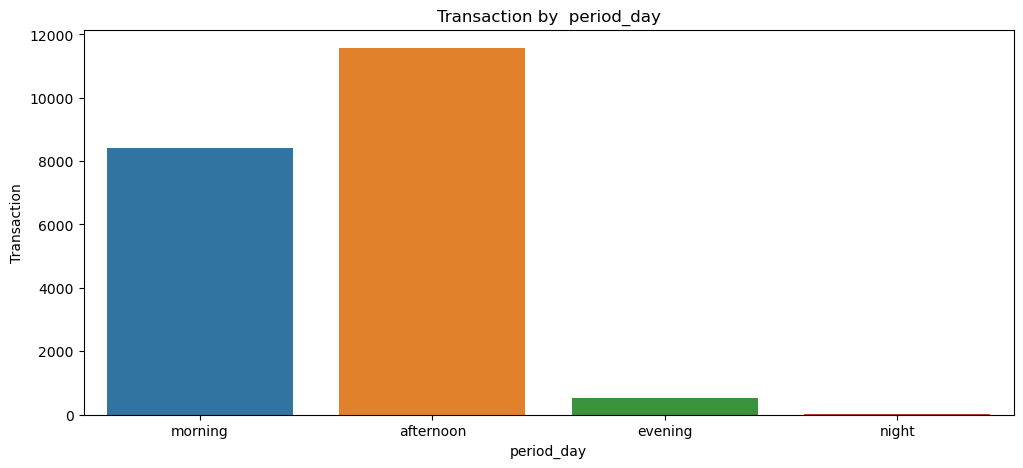

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
coutbyweekday=df.groupby('period_day')['Transaction'].count().reset_index()
coutbyweekday.sort_values('period_day',inplace=True)

plt.figure(figsize=(12,5))
sns.countplot(df['period_day'])
plt.xlabel('period_day')
plt.ylabel('Transaction')
plt.title('Transaction by  period_day')
plt.show()

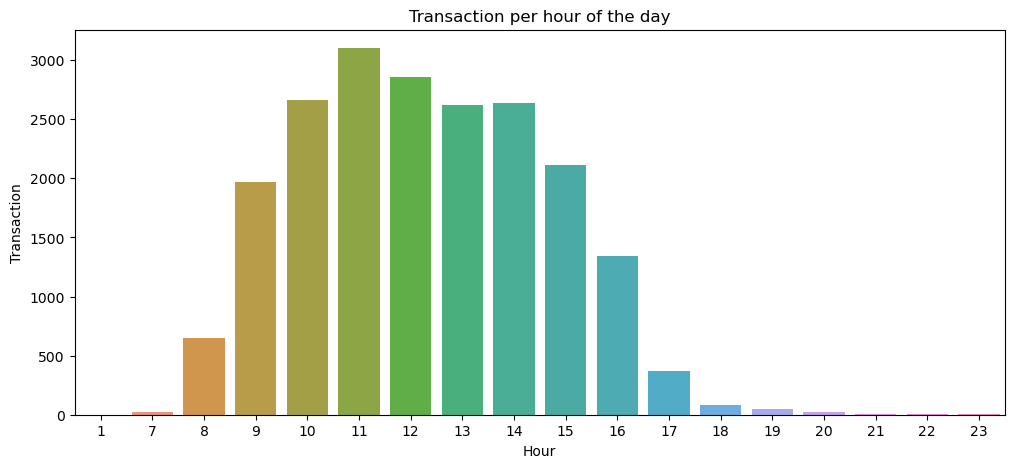

In [35]:
coutbyhour=df.groupby('hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('hour',inplace=True)

fig = plt.figure(figsize=(12,5))
sns.barplot(x=coutbyhour['hour'], y=coutbyhour['Transaction'])
plt.xlabel('Hour')
plt.ylabel('Transaction')
plt.title('Transaction per hour of the day')
plt.show()

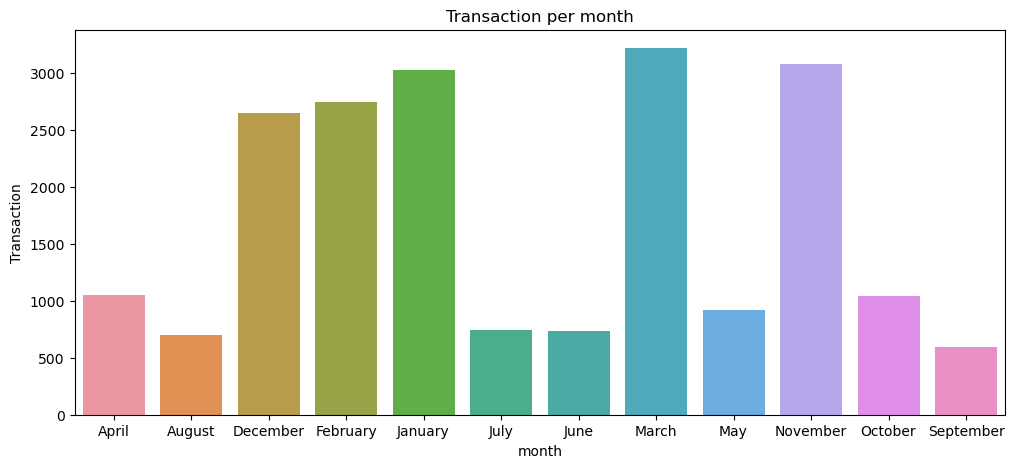

In [8]:
coutbymonth=df.groupby('month')['Transaction'].count().reset_index()
coutbymonth.sort_values('month',inplace=True)

fig = plt.figure(figsize=(12,5))
sns.barplot(x=coutbymonth['month'], y=coutbymonth['Transaction'])
plt.xlabel('month')
plt.ylabel('Transaction')
plt.title('Transaction per month')
plt.show()

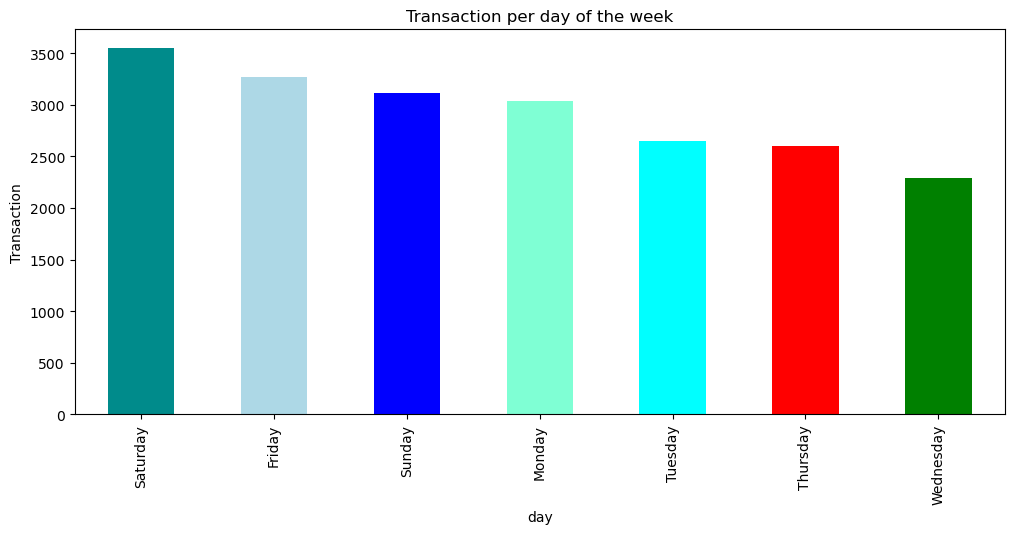

In [9]:
coutbydayp=df.groupby('day')['Transaction'].count().reset_index()
coutbydayp.sort_values('day',inplace=True)

plt.figure(figsize=(12,5))
df['day'].value_counts(dropna = False).plot.bar(color=['darkcyan','lightblue','blue','aquamarine', 'cyan','red', 'green'])
plt.xlabel('day')
plt.ylabel('Transaction')
plt.title('Transaction per day of the week')
plt.show()

In [10]:
#top sold products
df['Item'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Item, Length: 94, dtype: int64

# Market basket

After loading the data second step is find a list of product that are purchased in single transection.
so i merge the transection id with the date column from this we get columns that contains name of the products that are purchased in single transection.

In [11]:
df['single_transaction'] = df['Transaction'].astype(str)+'_'+df['date_time'].astype(str)
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month,day,hour,single_transaction
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,October,Sunday,9,1_2016-10-30 09:58:00
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,Sunday,10,2_2016-10-30 10:05:00
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,Sunday,10,2_2016-10-30 10:05:00
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,Sunday,10,3_2016-10-30 10:07:00
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,Sunday,10,3_2016-10-30 10:07:00


Now pivot the table convert the item into the column. the row represent the unique value in single transection and column represent the unique value in item transection. the value are count of occurrences of each combination.  

In [12]:
df2 = pd.crosstab(df['single_transaction'], df['Item'])
df2.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_2016-10-11 16:11:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001_2016-10-11 16:14:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1002_2016-10-11 16:15:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003_2016-10-11 16:17:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004_2016-10-11 16:21:00,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Above table mostly comprise of zeroes. In this code if item_freq is greater then zero the item is represent and item_freq is zero the item is not represent. even if there are multiples of the same item in the same transaction, the value will be encoded to 1 since market basket analysis does not take purchase frequency into consideration.

In [13]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = df2.applymap(encode)

The apriori library are use to find frequent itemsets and the association_rules library used for generate association rule based on the frequent itemsets.
the antecedents and	consequents	columns are shows the items that are frequently purchased together.

In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.head()

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Alfajores),0.327205,0.036344,0.010354,0.031644,0.870657,-0.001538,0.995145,-0.180870
1,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818,-0.133570
2,(Brownie),(Alfajores),0.040042,0.036344,0.002853,0.071240,1.960138,0.001397,1.037572,0.510264
3,(Alfajores),(Brownie),0.036344,0.040042,0.002853,0.078488,1.960138,0.001397,1.041721,0.508306
4,(Alfajores),(Cake),0.036344,0.103856,0.004120,0.113372,1.091624,0.000346,1.010733,0.087100


in below code we are sorting the table. the table show the top 10 products that are frequently purchased by the customers.

In [15]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
101,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
100,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
177,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
176,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
180,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
181,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
170,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
171,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
162,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
163,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
